In [1]:
library(magick)

Linking to ImageMagick 7.1.1.2
Enabled features: cairo, fontconfig, freetype, fftw, rsvg, webp, x11
Disabled features: ghostscript, heic, lcms, pango, raw



## Plot embeddings

In [2]:
methods <- c(
"poissonvi",
"binaryvi",
"peakvi",
"cistopic",
"cistopic_harmony",
"signac",
"signac_harmony",
"scale"
)

In [4]:
datasets <- c('trapnell')#c('neurips', 'satpathy', 'aerts', 'trapnell')

In [5]:
key_map <- list(
    neurips=c('cell_type', 'batch'), 
    satpathy=c('cell_type', 'Group'),
    aerts=c("CellType_lvl1", 'runName'),
    trapnell=c('cell_type', 'sample_name')
)

In [6]:
fig_path <- '/s/project/poisson_atac/panels/revision2/Figure2/embeddings/'

In [7]:

for(dataset in datasets){
    print(dataset)
    ct_key = key_map[[dataset]][1]
    b_key = key_map[[dataset]][2]
    panels_b <- sapply(methods, function(x){
        image_read_pdf(
            paste0(
            fig_path,
            "umap", dataset, "_", x, "_", b_key ,".pdf"
            )
        )})

    panels_ct <- sapply(methods, function(x){
        image_read_pdf(
            paste0(
            fig_path,
            "umap", dataset, "_", x, "_", ct_key, ".pdf"
            )
        )})

    batch1 <- c(panels_b[[1]], panels_b[[2]], panels_b[[3]], panels_b[[4]]) %>% 
        image_append() 
    batch2 <- c(panels_b[[5]], panels_b[[6]], panels_b[[7]], panels_b[[8]]) %>% 
        image_append() 
    ct1 <- c(panels_ct[[1]], panels_ct[[2]], panels_ct[[3]], panels_ct[[4]]) %>% 
        image_append() 
    ct2 <- c(panels_ct[[5]], panels_ct[[6]], panels_ct[[7]], panels_ct[[8]]) %>% 
        image_append() 

    combined <- image_append(c(ct1, batch1, ct2, batch2), stack=TRUE)

    image_write(
        combined, 
        path = paste0(fig_path, dataset, "_combined.pdf"), 
        format = "pdf", density=300)

        }

[1] "trapnell"


## Plot Extended Data Figure 1

In [10]:
fig_path <- '/data/ceph/hdd/project/node_08/poisson_atac/panels/revision2/Figure1/Suppl_1/'

In [62]:
plots <- list(
   'hematopoiesis_Reads_count_distribution.pdf', 'hematopoiesis_Fragments_count_distribution.pdf', 
    'trapnell_Reads_count_distribution.pdf', 'trapnell_Fragments_count_distribution.pdf',
    'aerts_Fragments_count_distribution.pdf', 'aerts_Fragments_count_distribution.pdf'
)

In [74]:
plots_3 <- list(
    'hematopoiesis_proportions.pdf', 'hematopoiesis_fragments_mean_var_scatter.pdf', 
    'hematopoiesis_fragments_mean_var_scatter.pdf',
    'trapnell_proportions.pdf', 'trapnell_reads_mean_var_scatter.pdf', 
    'trapnell_fragments_mean_var_scatter.pdf',
    'aerts_proportions.pdf', 'aerts_reads_mean_var_scatter.pdf', 
    'aerts_reads_mean_var_scatter.pdf'
)

In [67]:
panels_2 <-  lapply(plots, function(x){
        image_read_pdf(
            paste0(
            fig_path,
            x
            )
        )
    })

In [75]:
panels_3 <-  lapply(plots_3, function(x){
        image_read_pdf(
            paste0(
            fig_path,
            x
            )
        )
    })

In [122]:
p1 <- image_montage(
    c(panels_2[[1]], panels_2[[2]], panels_2[[3]], panels_2[[4]], panels_2[[5]], panels_2[[6]]), 
    geometry = 'x600+0+0', 
    tile = '2x3', 
    bg = 'white', 
    shadow = FALSE, 
    gravity='Center'
)

In [123]:
p2 <- image_montage(
    c(panels_3[[1]], panels_3[[2]], panels_3[[3]], panels_3[[4]], panels_3[[5]], panels_3[[6]], 
     panels_3[[7]], panels_3[[8]], panels_3[[9]]), 
    geometry = 'x600-10+10', 
    tile = '3x3', 
    bg = 'white', 
    shadow = FALSE, 
    gravity='Center'
)

In [124]:
p3 <- image_append(c(p1, p2), stack=TRUE)

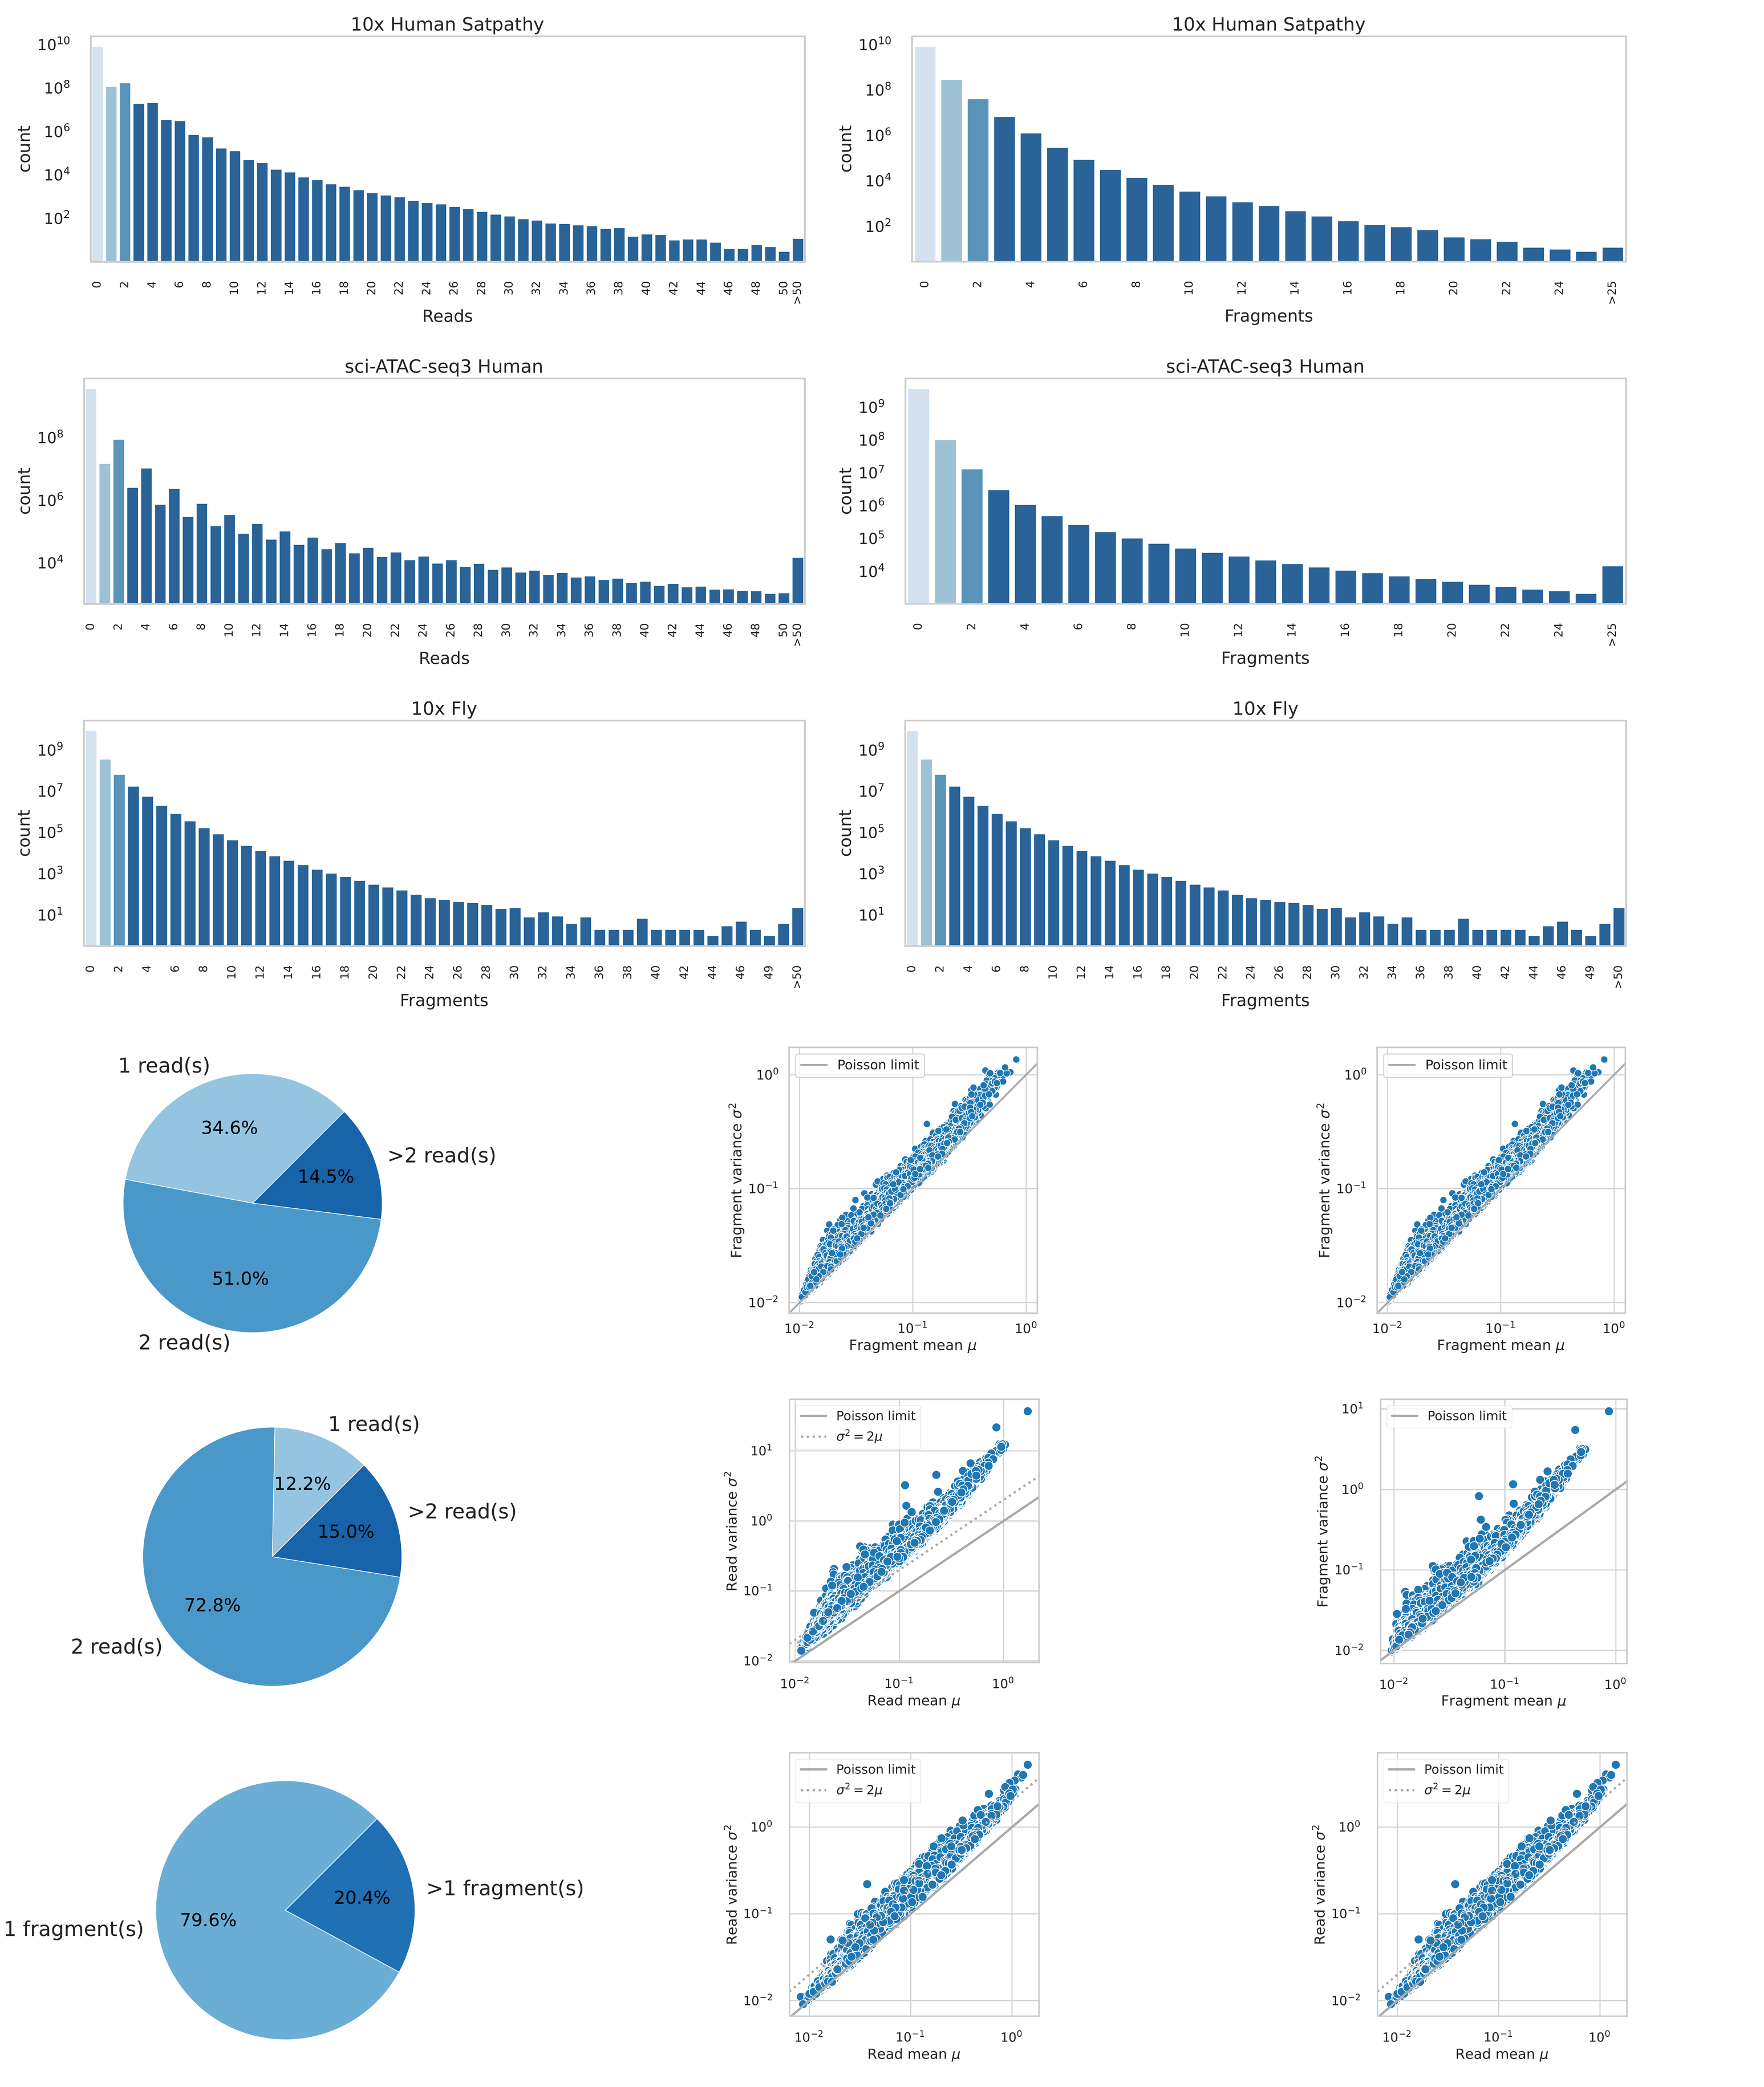

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 ""      3093   3660 sRGB       FALSE        0 +72x+72

In [125]:
p3

In [126]:
image_write(
        p3, 
        path = paste0(fig_path, "combined.pdf"), 
        format = "pdf", density=600)